# Agent Class Examples

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

In [2]:
from neuralplayground.agents import AgentCore

In [3]:
class RandomAgent(AgentCore):

    def __init__(self, step_size=1):
        super().__init__()
        self.step_size = step_size

    def act(self, obs):
        return np.random.normal(scale=self.step_size, size=(2,))

In [22]:
class LevyFlightAgent(RandomAgent):

    def __init__(self, alpha=0.3, beta=1, loc=1.0, scale=0.8, step_size=0.3, max_step_size=50):
        super().__init__(step_size=step_size)
        self.levy = levy_stable(alpha, beta, loc=loc, scale=scale)
        self.alpha = alpha
        self.beta = beta
        self.max_step_size=max_step_size
    
    def act(self, obs):
        direction = super().act(obs)
        direction = direction/np.sqrt(np.sum(direction**2))*self.step_size
        r = np.clip(self.levy.rvs(), a_min=0, a_max=self.max_step_size)
        return r*direction
    
    def step_size_distribution(self):
        x = np.linspace(0, 20, num=100)
        pdf = self.levy.pdf(x)
        plt.plot(x, pdf)
        plt.show()

In [23]:
agent = LevyFlightAgent()

In [24]:
from neuralplayground.arenas import Simple2D, ConnectedRooms

In [25]:
time_step_size = 0.1 #sec
agent_step_size = 3

# Init environment
env = Simple2D(time_step_size = time_step_size,
               agent_step_size = agent_step_size,
               arena_x_limits=(-100, 100), 
               arena_y_limits=(-100, 100))

In [26]:
n_steps = 10000

# Initialize environment
obs, state = env.reset()
for i in range(n_steps):
    # Observe to choose an action
    action = agent.act(obs)
    # Run environment for given action
    # print(action)
    obs, state, reward = env.step(action)

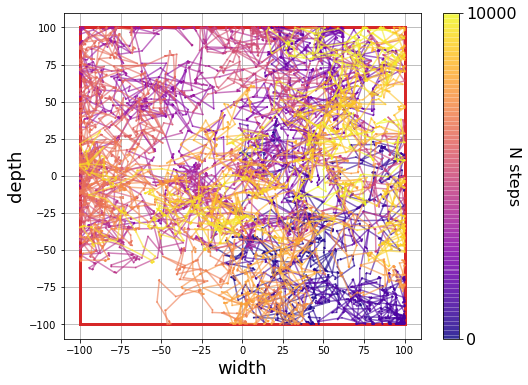

In [27]:
ax = env.plot_trajectory()
fontsize = 18
ax.grid()
# ax.legend(fontsize=fontsize, loc="upper left")
ax.set_xlabel("width", fontsize=fontsize)
ax.set_ylabel("depth", fontsize=fontsize)
# plt.savefig("two_rooms.pdf", bbox_inches="tight")
plt.show()

2.1797067094671263
[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.1616

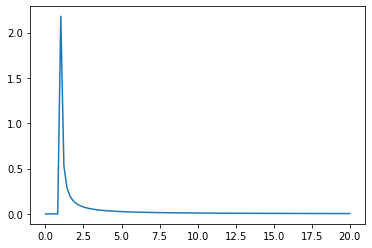

In [21]:
agent.step_size_distribution()

In [25]:
alphas = np.linspace(0.3, 0.7, num=50)
alphas_line = np.linspace(0.1, 1, num=50)
x = np.linspace(0, 20, num=100)

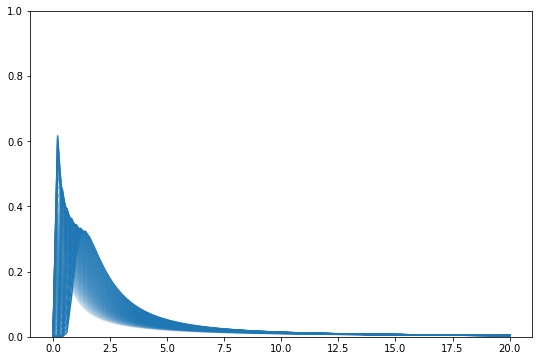

In [26]:
f, ax = plt.subplots(1, 1, figsize=(9, 6))
for i in range(len(alphas)):
    levy = levy_stable(alpha=alphas[i], beta=1, scale=1)
    ax.plot(x, levy.pdf(x), color="C0", alpha=alphas_line[i])
ax.set_ylim([0, 1.0])
plt.show()

In [27]:
betas = np.linspace(0.1, 1, num=50)
alphas_line = np.linspace(0.1, 1, num=50)
x = np.linspace(0, 20, num=100)

KeyboardInterrupt: 

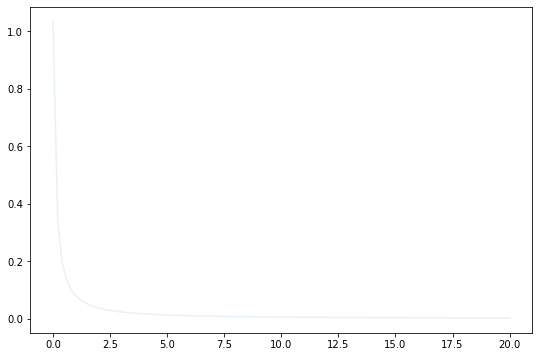

In [28]:
f, ax = plt.subplots(1, 1, figsize=(9, 6))
for i in range(len(betas)):
    levy = levy_stable(alpha=0.4, beta=betas[i], scale=1)
    ax.plot(x, levy.pdf(x), color="C0", alpha=alphas_line[i])
ax.set_ylim([0, 1.0])
plt.show()